## Step1:Collecting data
a. Vacant Buildings
https://data.baltimorecity.gov/Housing-Development/Vacant-Buildings/qqcv-ihn5

https://data.baltimorecity.gov/resource/qqcv-ihn5.json

Updated：June 24, 2020 Data Provided by：Housing Authority of Baltimore City Introduction:Vacant Buildings located throughout the City of Baltimore. To be updated twice a month, or as needed.

b. 311 Customer Service Requests
https://data.baltimorecity.gov/City-Services/311-Customer-Service-Requests/9agw-sxsr

https://data.baltimorecity.gov/resource/9agw-sxsr.json

Updated:June 28, 2020 Data Provided by:BCIT

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
from pandas import DataFrame,Series
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
urla="https://data.baltimorecity.gov/resource/qqcv-ihn5.geojson?$limit=1000000&\
$where=NoticeDate%20between%20%272018-01-01T00:00:00%27%20and%20%272020-06-01T00:00:00%27"
#?method=export&format=GeoJSON"
dfa= gpd.read_file(urla)
dfa.shape

(4450, 13)

In [3]:
pd.options.display.max_columns = None
dfa = dfa[dfa.geometry.notnull()]
dfa.dropna(thresh=10)
dfa=dfa.to_crs('epsg:3857')
dfa.head()

,location_state,location_zip,policedistrict,councildistrict,neighborhood,location_address,referenceid,noticedate,location_city,buildingaddress,block,lot,geometry
0,,,Central,11,Druid Heights,,0328 009 010118,2018-01-01T00:00:00,,1816 DRUID HILL AVE,0328,009,POINT (-8530857.290 4765612.170)
1,,,Central,7,Druid Heights,,0307 014 010218,2018-01-02T00:00:00,,2128 DIVISION ST,0307,014,POINT (-8531320.079 4765851.011)
2,,,Western,9,Sandtown-Winchester,,0059 077 010418,2018-01-04T00:00:00,,1016 MCKEAN AVE,0059,077,POINT (-8532309.638 4764805.955)
3,,,Southeastern,13,McElderry Park,,1642 027 010418,2018-01-04T00:00:00,,608 N LAKEWOOD AVE,1642,027,POINT (-8524810.869 4764494.060)
4,,,Western,9,Sandtown-Winchester,,0059 082 010418,2018-01-04T00:00:00,,1006 MCKEAN AVE,0059,082,POINT (-8532308.417 4764779.537)


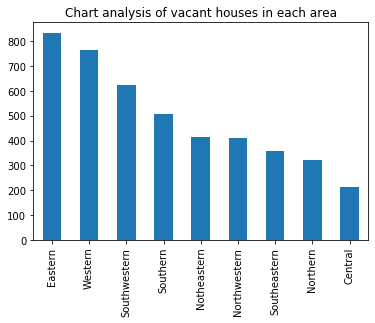

In [4]:
select=['neighborhood','policedistrict', 'councildistrict','buildingaddress', 'geometry']
dfa=dfa[select]
bar=dfa['policedistrict'].value_counts()
bar.plot(title='Chart analysis of vacant houses in each area',x='policedistrict', y='count',kind='bar')
plt.show()

In [5]:
urlb="https://data.baltimorecity.gov/resource/9agw-sxsr.geojson?$limit=10000&\
$where=CreatedDate%20between%20%272018-01-01T00:00:00%27%20and%20%272020-06-01T00:00:00%27"
#?method=export&format=GeoJSON"
dfb= gpd.read_file(urlb)
dfb.shape

(10000, 26)

In [6]:
dfb = dfb[dfb.geometry.notnull()]
dfb.dropna(thresh=10)
dfb=dfb.to_crs('epsg:3857')
dfb.head()

,statusdate,zipcode,latitude,policedistrict,councildistrict,lastactivitydate,geolocation_address,neighborhood,duedate,agency,geolocation_zip,outcome,geolocation_state,lastactivity,closedate,longitude,srstatus,policepost,srtype,servicerequestnum,srrecordid,methodreceived,address,geolocation_city,createddate,geometry
0,2018-01-07T10:56:27,21133,39.380772267809400,None,None,None,,None,2018-01-03T00:09:52,Water Wastewater,,None,,None,2018-01-07T00:00:00,-76.788520625776500,Closed,None,WW-Water Leak (Exterior),18-00000002,5004100000dJV2HAAW,Phone,"4012 SANLEE RD, RANDALLSTOWN, 21133",,2018-01-01T00:09:52,POINT (-8548059.015 4776361.628)
1,2018-01-01T01:45:52,21224,39.285421756050700,Southeastern,1,None,,Brewers Hill,2018-01-08T00:11:38,Call Center,,None,,None,2018-01-01T01:45:51,-76.563433323077800,Closed,233,ECC-Miscellaneous Request,18-00000003,5004100000dJV2IAAW,API,"610 GRUNDY ST, Baltimore City, 21224",,2018-01-01T00:11:38,POINT (-8523002.411 4762638.646)
2,2018-01-03T17:02:28,21213,39.315417630552400,Northeastern,13,None,,Belair-Edison,2018-01-02T00:14:31,Water Wastewater,,None,,None,2018-01-01T00:14:31,-76.567433412041100,Closed,432,WW-Water No Water,18-00000004,5004100000dJV2JAAW,Phone,"3616 RAVENWOOD AVE, Baltimore City, 21213",,2018-01-01T00:14:31,POINT (-8523447.699 4766953.678)
3,2018-01-02T16:27:47,21229,39.267255883981400,Southwestern,10,None,,Violetville,2018-01-15T00:18:28,Health,,None,,None,2018-01-02T16:27:46,-76.672765612885400,Closed,832,HLTH-Animal Barking Dog,18-00000006,5004100000dJV2KAAW,API,"1234 S GRANTLEY ST, Baltimore City, 21229",,2018-01-01T00:18:28,POINT (-8535173.226 4760026.307)
4,2018-02-07T14:33:36,21224,39.279168568212400,Southeastern,1,None,,Canton,2018-01-15T00:26:43,Mayor's Office,,None,,None,2018-02-07T14:33:36,-76.578019117253800,Closed,232,MOHS-Homeless Outreach,18-00000007,5004100000dJV1pAAG,Phone,"LAKEWOOD AVE & BOSTON ST, Baltimore City, 21224",,2018-01-01T00:26:43,POINT (-8524626.094 4761739.331)


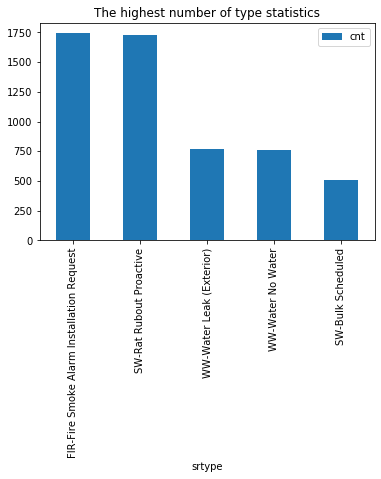

In [7]:
dfb.rename(columns={'neighborhood':'b_neighborhood'},inplace=True)
select=['b_neighborhood','zipcode', 'latitude', 'longitude','srtype', 'methodreceived','geometry']
dfb=dfb[select]
bar=dfb.groupby(['srtype'],as_index=False)['srtype'].agg({'cnt':'count'})
bar=bar.sort_values(by='cnt',ascending=False)
bar=bar[bar.cnt>500]
bar.plot(title='The highest number of type statistics',x='srtype', y='cnt',kind='bar')
plt.show()

## Step2: Multi-data source merge

Objective: To maintain all the data in B data set so that there are both Zombie and non-Zombie houses in B data set, and then classify them
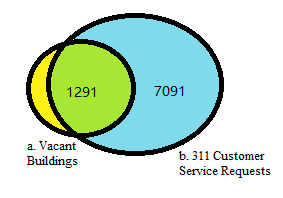

In [8]:
df=pd.merge(dfa,dfb,how='right',left_on='neighborhood',right_on='b_neighborhood')
df2=df.drop_duplicates(subset='geometry_y', keep='first', inplace=False)
df2.fillna(np.nan)
df4=df2[df2.isnull().T.any()]
df4.srtype.value_counts().head(15)

WW-Water No Water                            293
SW-Rat Rubout Proactive                      270
WW-Water Leak (Exterior)                     270
FIR-Fire Smoke Alarm Installation Request     88
SW-Bulk Scheduled                             43
WW-Water Low Pressure                         40
TRM-Snow/Icy Conditions                       25
WW-Water Turn Off (Request)                   21
WW-Water Meter Leak                           20
TRS-Parking Complaint                         16
WW-Water Water In Basement                    15
SW-Dirty Street                               13
SW-Cleaning                                   12
WW-Sewer Water In Basement                     9
SW-Mixed Refuse                                8
Name: srtype, dtype: int64

In [9]:
df3=df2[['councildistrict', 'srtype', 'methodreceived']]
df3=df3[df3['srtype'].isin(['WW-Water No Water',
'WW-Water Leak (Exterior)',                  
'SW-Rat Rubout Proactive',                     
'FIR-Fire Smoke Alarm Installation Request',
'SW-Bulk Scheduled',                            
'WW-Water Low Pressure',                       
'TRM-Snow/Icy Conditions',                      
'WW-Water Turn Off (Request)',                  
'WW-Water Meter Leak',                          
'TRS-Parking Complaint',                     
'WW-Water Water In Basement',             
'SW-Dirty Street',                            
'SW-Cleaning',                                 
'WW-Sewer Water In Basement',                    
'FCCS-Refunds'])]
df3= df3.dropna(subset=["methodreceived"])
bar=df3.groupby(['srtype'],as_index=False)['srtype'].agg({'cnt':'count'})
bar=bar.sort_values(by='cnt',ascending=False)
bar=bar[bar.cnt>100]
bar

,srtype,cnt
1,FIR-Fire Smoke Alarm Installation Request,1690
5,SW-Rat Rubout Proactive,1581
12,WW-Water No Water,670
9,WW-Water Leak (Exterior),614
2,SW-Bulk Scheduled,493
6,TRM-Snow/Icy Conditions,332
7,TRS-Parking Complaint,182
3,SW-Cleaning,138
4,SW-Dirty Street,119
14,WW-Water Water In Basement,102


## Step3:Label the data in different columns
###  Choose the indicators to determine whether a house is a zombie house

In [23]:
df3.rename(columns={'councildistrict':'NonZombie'},inplace=True)
df3=df3.fillna(0)
df3['NonZombie'].replace([2,3,4,5,6,7,8,9,10,11,12,13,14],1,inplace=True)
df3['NonZombie'].value_counts()

1    5094
0    1118
Name: NonZombie, dtype: int64

In [24]:
df3.loc[df3['methodreceived']=='Phone','methodreceived']=1
df3.loc[df3['methodreceived']=='Internal','methodreceived']=2
df3.loc[df3['methodreceived']=='API','methodreceived']=3
df3.loc[df3['methodreceived']=='Email','methodreceived']=4
df3.loc[df3['methodreceived']=='Other','methodreceived']=5
df3.loc[df3['methodreceived']=='Mail','methodreceived']=6

i=1
for item in ['WW-Water No Water',
'WW-Water Leak (Exterior)',                  
'SW-Rat Rubout Proactive',                     
'FIR-Fire Smoke Alarm Installation Request',
'SW-Bulk Scheduled',                            
'WW-Water Low Pressure',                       
'TRM-Snow/Icy Conditions',                      
'WW-Water Turn Off (Request)',                  
'WW-Water Meter Leak',                          
'TRS-Parking Complaint',                     
'WW-Water Water In Basement',             
'SW-Dirty Street',                            
'SW-Cleaning',                                 
'WW-Sewer Water In Basement',                    
'FCCS-Refunds']:
    df3.loc[df3['srtype']==item,'srtype']=i
    i=i+1
df3.head()

E:\anaconda3\envs\GEG584\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,NonZombie,srtype,methodreceived
49,1,2,3
196,1,2,3
245,1,11,1
294,1,1,1
392,1,2,3


### Take NonZombie as the dependent variable->y

In [25]:
df3['NonZombie'].value_counts()

1    5094
0    1118
Name: NonZombie, dtype: int64

### Take srtype and	methodreceived as the independent variable->x

In [26]:
df3['srtype'].value_counts(ascending=True)

15      20
9       52
6       56
8       66
14      97
11     102
12     119
13     138
10     182
7      332
5      493
2      614
1      670
3     1581
4     1690
Name: srtype, dtype: int64

In [27]:
df3['methodreceived'].value_counts(ascending=True)

5       1
6       1
4       2
3     952
2    1602
1    3654
Name: methodreceived, dtype: int64

#### 重复执行语句

In [16]:
df3['NonZombie']=pd.to_numeric(df3.NonZombie)
df3['srtype']=pd.to_numeric(df3.srtype)
df3['methodreceived']=pd.to_numeric(df3.methodreceived)

## Step4: Decisiontree

In [28]:
df3.dtypes

NonZombie         int64
srtype            int64
methodreceived    int64
dtype: object

In [29]:
X=df3[['srtype','methodreceived']].values.astype(float)
y=df3[['NonZombie']].values.astype(int)
from sklearn import tree
clf=tree.DecisionTreeClassifier()
clf=clf.fit(X,y)
clf.score(X,y)

0.8358016741790084

In [30]:
predicted_y=clf.predict(X)
from sklearn import metrics
print(metrics.classification_report(y,predicted_y))
print('Confusion matrix: ')
print(metrics.confusion_matrix(y,predicted_y))
tu1=metrics.confusion_matrix(y,predicted_y)
tu2=metrics.classification_report(y,predicted_y)

              precision    recall  f1-score   support

           0       0.73      0.14      0.24      1118
           1       0.84      0.99      0.91      5094

    accuracy                           0.84      6212
   macro avg       0.78      0.56      0.57      6212
weighted avg       0.82      0.84      0.79      6212

Confusion matrix: 
[[ 157  961]
 [  59 5035]]


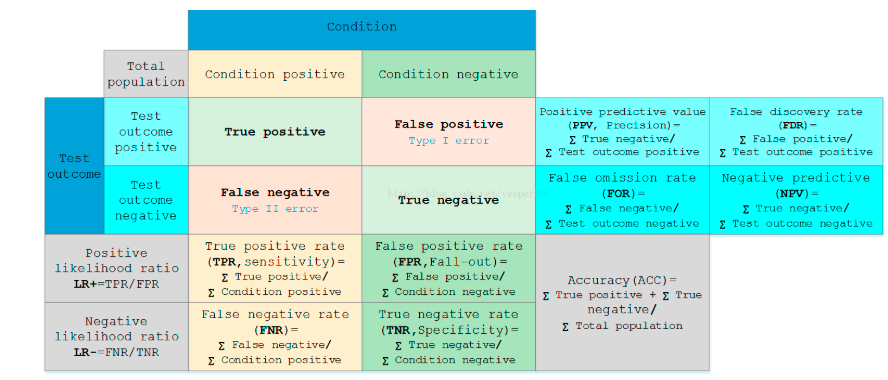

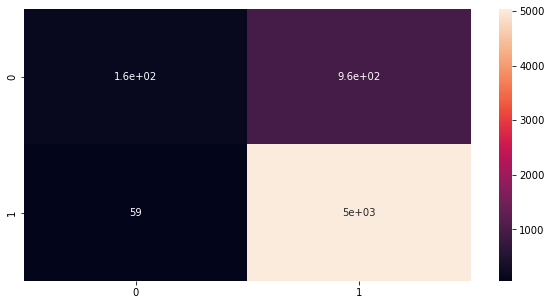

In [31]:
import matplotlib.pyplot as plt
import seaborn as sn

plt.figure(figsize=(10, 5))
sn.heatmap(tu1, annot=True)

## Step5: Take an independent variable and do a comparative experiment

In [32]:
X=df3[['srtype']].values.astype(float)
y=df3[['NonZombie']].values.astype(int)
from sklearn import tree
clf=tree.DecisionTreeClassifier()
clf=clf.fit(X,y)
clf.score(X,y)

0.8238892466194462

In [33]:
predicted_y=clf.predict(X)
from sklearn import metrics
print(metrics.classification_report(y,predicted_y))
print('Confusion matrix: ')
print(metrics.confusion_matrix(y,predicted_y))
tu1=metrics.confusion_matrix(y,predicted_y)
tu2=metrics.classification_report(y,predicted_y)

              precision    recall  f1-score   support

           0       0.71      0.04      0.07      1118
           1       0.82      1.00      0.90      5094

    accuracy                           0.82      6212
   macro avg       0.77      0.52      0.49      6212
weighted avg       0.80      0.82      0.75      6212

Confusion matrix: 
[[  40 1078]
 [  16 5078]]


### Conclusion: It's better to pick two variables